In [83]:
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.imputation.mice as mice
import matplotlib.pyplot as plt
from PIL import Image as pil


from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer

%matplotlib inline

## 1. About Team Project
### 1.1 Subject : Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
### 1.2 Purpose : Can you improve the algorithm that changed the world of real estate?
### 1.3 Evuation 
- Mean Alsolute Error
> logerror = log(Zestimate) - log(SalePrice)


## 2.  Load Data

In [84]:
fir_train2016 = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])
print(fir_train2016.shape)
fir_train2016.tail()

(90275, 3)


,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [85]:
train2017 = pd.read_csv("train_2017.csv", parse_dates=["transactiondate"])
print(train2017.shape)
train2017.tail()

(77613, 3)


,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [86]:
property2016 = pd.read_csv("properties_2016.csv")
print(property2016.shape)
property2016.tail()
property2017 = pd.read_csv("properties_2017.csv")
print(property2016.shape)
property2016.tail()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
train2016 = fir_train2016.set_index('parcelid').join(property2016.set_index('parcelid'))
train2016["abs_logerror"] = abs(fir_train2016["logerror"])
train2016.reset_index(inplace=True)
print(train2016.shape)
train2016.head()

(90275, 61)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,abs_logerror
0,10711738,0.0276,2016-08-02,1.0,NaN,NaN,3.0,4.0,NaN,4.0,...,NaN,245180.0,567112.0,2015.0,321932.0,7219.18,NaN,NaN,6.037113e+13,NaN
1,10711755,-0.0182,2016-08-02,1.0,NaN,NaN,3.0,3.0,NaN,4.0,...,NaN,254691.0,459844.0,2015.0,205153.0,6901.09,NaN,NaN,6.037113e+13,NaN
2,10711805,-0.1009,2016-05-03,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,235114.0,384787.0,2015.0,149673.0,4876.61,NaN,NaN,6.037113e+13,NaN
3,10711816,-0.0121,2016-04-05,1.0,NaN,NaN,2.0,4.0,NaN,4.0,...,NaN,262309.0,437176.0,2015.0,174867.0,5560.07,NaN,NaN,6.037113e+13,NaN
4,10711858,-0.0481,2016-07-15,1.0,NaN,NaN,2.0,4.0,NaN,4.0,...,NaN,232037.0,382055.0,2015.0,150018.0,4878.25,NaN,NaN,6.037113e+13,NaN


## 3 . Target analysis

In [88]:
train2016["transactiondate-year"] = train2016["transactiondate"].dt.year
train2016["transactiondate-month"] = train2016["transactiondate"].dt.month
train2016["transactiondate-day"] = train2016["transactiondate"].dt.day

print(train2016.shape)
train2016.tail()

(90275, 64)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,abs_logerror,transactiondate-year,transactiondate-month,transactiondate-day
90270,162960704,-0.0151,2016-07-19,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2015.0,271726.0,6314.44,NaN,NaN,6.111006e+13,NaN,2016,7,19
90271,162960769,-0.0171,2016-06-06,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,2015.0,93065.0,2853.08,NaN,NaN,6.111006e+13,NaN,2016,6,6
90272,162960801,-0.0050,2016-10-12,NaN,NaN,NaN,2.0,4.0,NaN,NaN,...,2015.0,22069.0,2345.04,NaN,NaN,6.111008e+13,NaN,2016,10,12
90273,162960829,-0.0704,2016-04-08,NaN,NaN,NaN,2.0,3.0,NaN,NaN,...,2015.0,95526.0,3248.82,NaN,NaN,NaN,NaN,2016,4,8
90274,162960842,-0.0545,2016-06-10,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2015.0,321770.0,7542.12,NaN,NaN,6.111006e+13,NaN,2016,6,10


In [89]:
month_sale_count = train2016.groupby('transactiondate-month').count()
month_sale_count = month_sale_count.reset_index()
month_sale_count["count"] = month_sale_count["parcelid"]
month_sale_count[["transactiondate-month", "parcelid", "count"]].head()

,transactiondate-month,parcelid,count
0,1,6556,6556
1,2,6333,6333
2,3,8652,8652
3,4,9311,9311
4,5,9961,9961


In [90]:
day_sale_count = train2016.groupby('transactiondate-day').count()
day_sale_count = day_sale_count.reset_index()
day_sale_count["count"] = day_sale_count["parcelid"]
day_sale_count[["transactiondate-day", "parcelid", "count"]].head()

,transactiondate-day,parcelid,count
0,1,3784,3784
1,2,2422,2422
2,3,2498,2498
3,4,2319,2319
4,5,2571,2571


In [91]:
train2017["transactiondate-year"] = train2017["transactiondate"].dt.year
train2017["transactiondate-month"] = train2017["transactiondate"].dt.month
train2017["transactiondate-day"] = train2017["transactiondate"].dt.day

print(train2017.shape)
train2017.tail()

(77613, 6)


,parcelid,logerror,transactiondate,transactiondate-year,transactiondate-month,transactiondate-day
77608,10833991,-0.002245,2017-09-20,2017,9,20
77609,11000655,0.020615,2017-09-20,2017,9,20
77610,17239384,0.013209,2017-09-21,2017,9,21
77611,12773139,0.037129,2017-09-21,2017,9,21
77612,12826780,0.007204,2017-09-25,2017,9,25


In [92]:
month_sale_count2 = train2017.groupby('transactiondate-month').count()
month_sale_count2 = month_sale_count2.reset_index()
month_sale_count2["count"] = month_sale_count2["parcelid"]
month_sale_count2[["transactiondate-month", "parcelid", "count"]].head()

,transactiondate-month,parcelid,count
0,1,7025,7025
1,2,6412,6412
2,3,9327,9327
3,4,8679,8679
4,5,10487,10487


In [93]:
day_sale_count2 = train2017.groupby('transactiondate-day').count()
day_sale_count2 = day_sale_count2.reset_index()
day_sale_count2["count"] = day_sale_count2["parcelid"]
day_sale_count2[["transactiondate-day", "parcelid", "count"]].head()

,transactiondate-day,parcelid,count
0,1,2779,2779
1,2,1845,1845
2,3,2064,2064
3,4,1500,1500
4,5,2396,2396


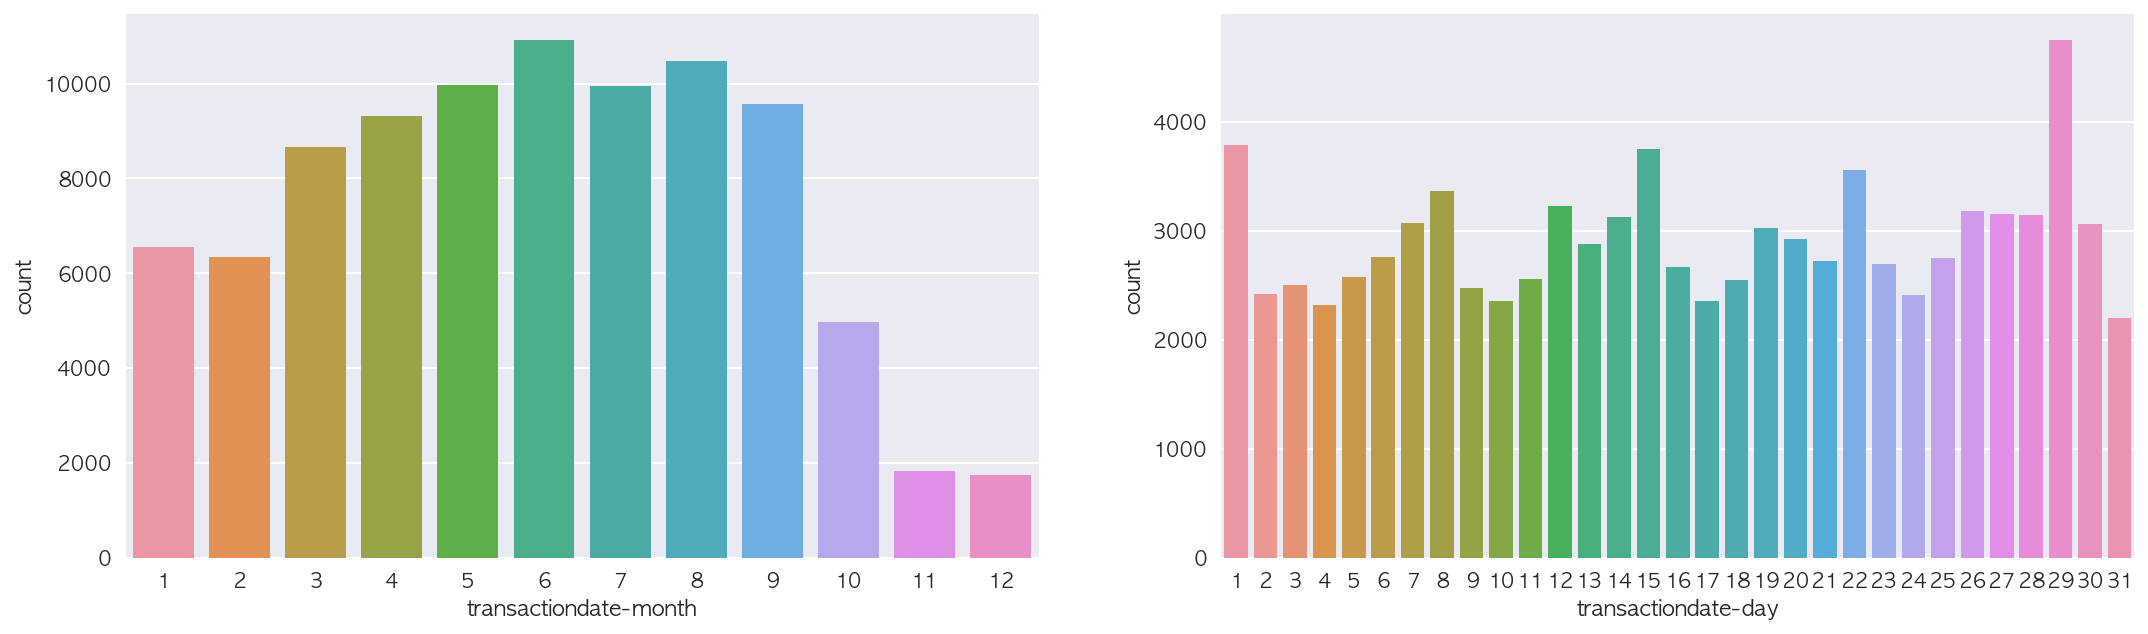

In [94]:
%matplotlib inline
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 5)

sns.barplot(data=month_sale_count, x="transactiondate-month", y="count", ax=ax1)
sns.barplot(data=day_sale_count, x="transactiondate-day", y="count", ax=ax2)

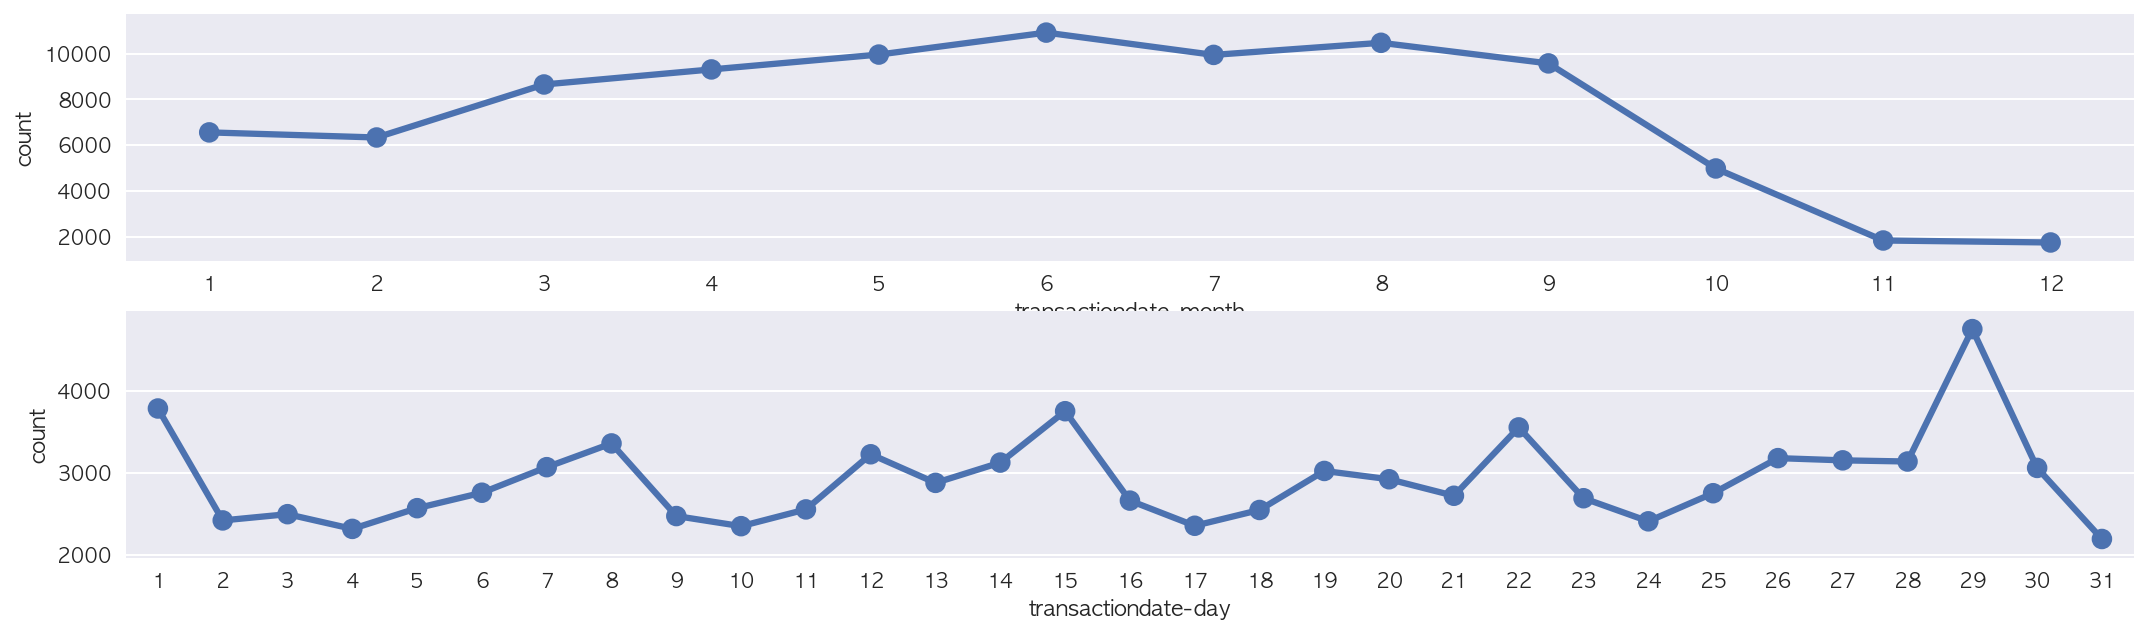

In [95]:
figure, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18, 5)

sns.pointplot(data=month_sale_count, x="transactiondate-month", y="count", ax=ax1)
sns.pointplot(data=day_sale_count, x="transactiondate-day", y="count", ax=ax2)

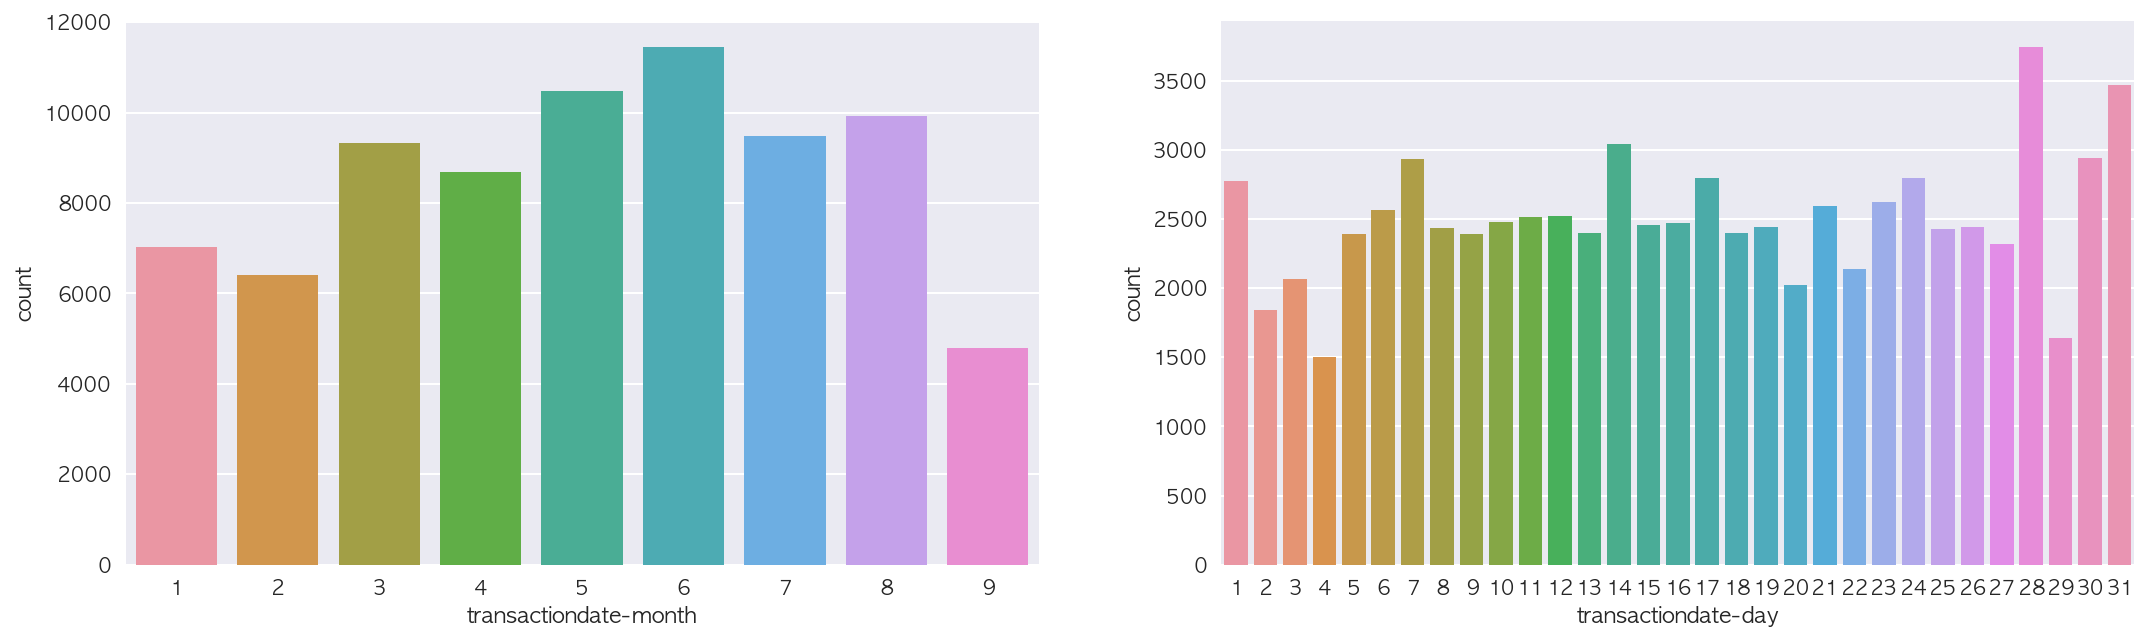

In [96]:
%matplotlib inline
figure, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18, 5)

sns.barplot(data=month_sale_count2, x="transactiondate-month", y="count", ax=ax1)
sns.barplot(data=day_sale_count2, x="transactiondate-day", y="count", ax=ax2)

In [97]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

train2016["transactiondate-year_month"] = train2016["transactiondate"].apply(concatenate_year_month)

print(train2016.shape)
train2016[["transactiondate", "transactiondate-year_month"]].head()

(90275, 65)


,transactiondate,transactiondate-year_month
0,2016-08-02,2016-8
1,2016-08-02,2016-8
2,2016-05-03,2016-5
3,2016-04-05,2016-4
4,2016-07-15,2016-7


In [98]:
train2017["transactiondate-year_month"] = train2017["transactiondate"].apply(concatenate_year_month)

print(train2017.shape)
train2017[["transactiondate", "transactiondate-year_month"]].head()

(77613, 7)


,transactiondate,transactiondate-year_month
0,2017-01-01,2017-1
1,2017-01-01,2017-1
2,2017-01-01,2017-1
3,2017-01-01,2017-1
4,2017-01-01,2017-1


In [99]:
md_sale_count = train2016.groupby('transactiondate-year_month').count()
md_sale_count = pd.DataFrame(md_sale_count["parcelid"], index=['2016-1', '2016-2', '2016-3', '2016-4', '2016-5', '2016-6',\
                                                               '2016-7', '2016-8', '2016-9', '2016-10', '2016-11', '2016-12'])

md_sale_count["count"] = md_sale_count["parcelid"]
md_sale_count.drop("parcelid", axis=1, inplace=True)
md_sale_count

,count
2016-1,6556
2016-2,6333
2016-3,8652
2016-4,9311
2016-5,9961
2016-6,10922
2016-7,9947
2016-8,10476
2016-9,9575
2016-10,4977


In [100]:
md_sale_count2 = train2017.groupby('transactiondate-year_month').count()
md_sale_count2 = pd.DataFrame(md_sale_count2["parcelid"], index=['2017-1', '2017-2', '2017-3', '2017-4', '2017-5', '2017-6',\
                                                               '2017-7', '2017-8', '2017-9', '2017-10', '2017-11', '2017-12'])

md_sale_count2["count"] = md_sale_count2["parcelid"]
md_sale_count2.drop("parcelid", axis=1, inplace=True)
md_sale_count2

,count
2017-1,7025.0
2017-2,6412.0
2017-3,9327.0
2017-4,8679.0
2017-5,10487.0
2017-6,11456.0
2017-7,9490.0
2017-8,9936.0
2017-9,4801.0
2017-10,NaN


In [101]:
md_sale_count3 = pd.concat([md_sale_count, md_sale_count2])
md_sale_count3.head()

,count
2016-1,6556.0
2016-2,6333.0
2016-3,8652.0
2016-4,9311.0
2016-5,9961.0


[Text(0,0.5,'count'), Text(0.5,0,'transactiondate-year_month')]

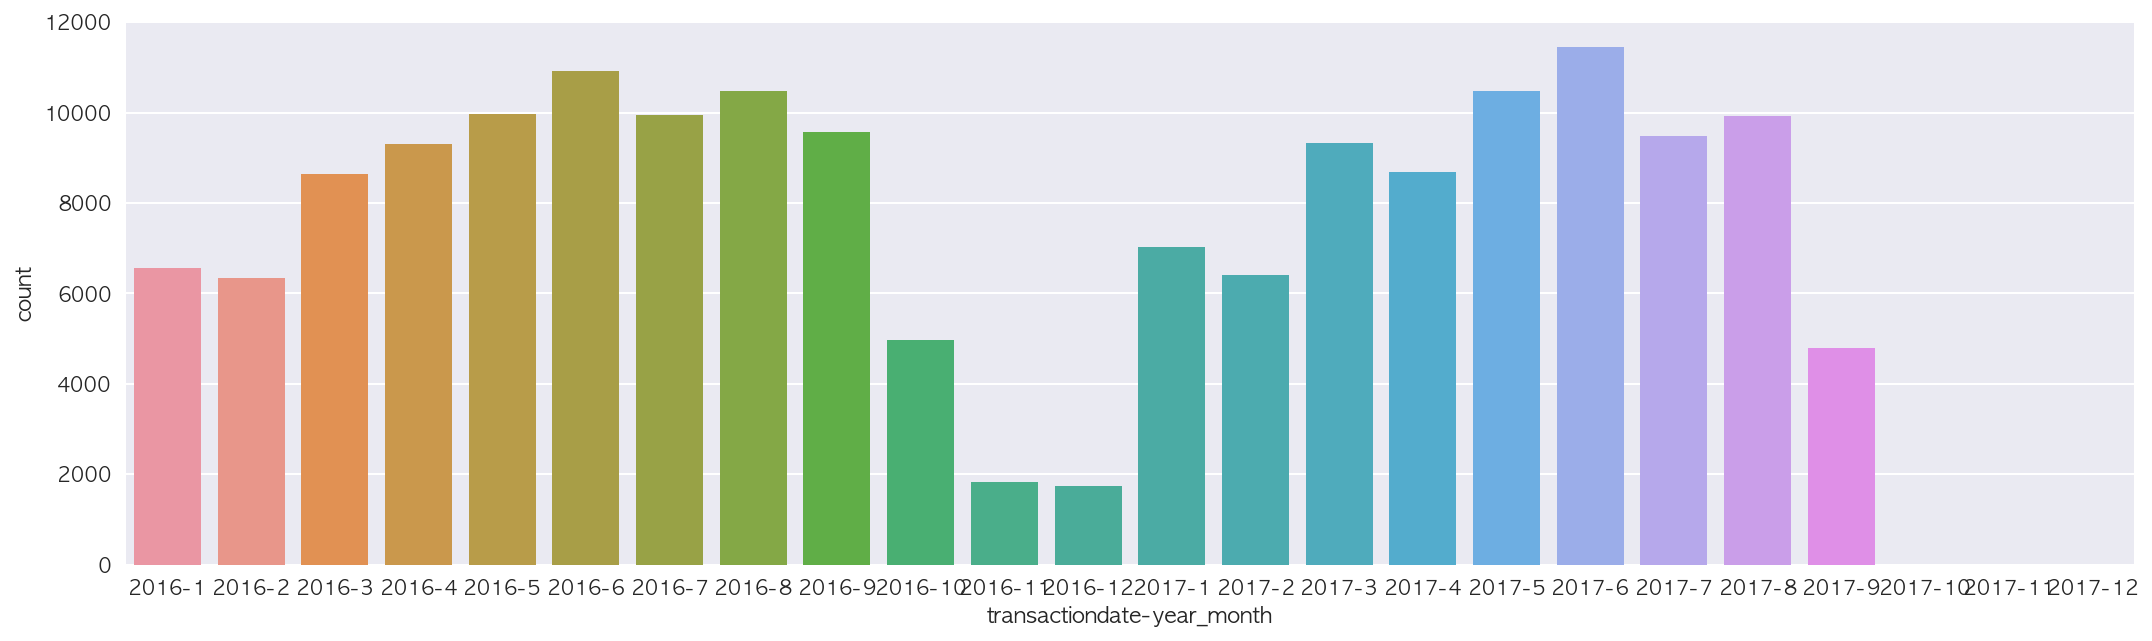

In [102]:
figure, (ax3) = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18, 5)

#sns.barplot(data=month_sale_count, x="transactiondate-month", y="count", ax=ax1)
#sns.barplot(data=month_sale_count2, x="transactiondate-month", y="count", ax=ax2)
sns.barplot(data=md_sale_count3, x=md_sale_count3.index, y="count", ax=ax3)
ax3.set(xlabel='transactiondate-year_month', ylabel='count')

logerror

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


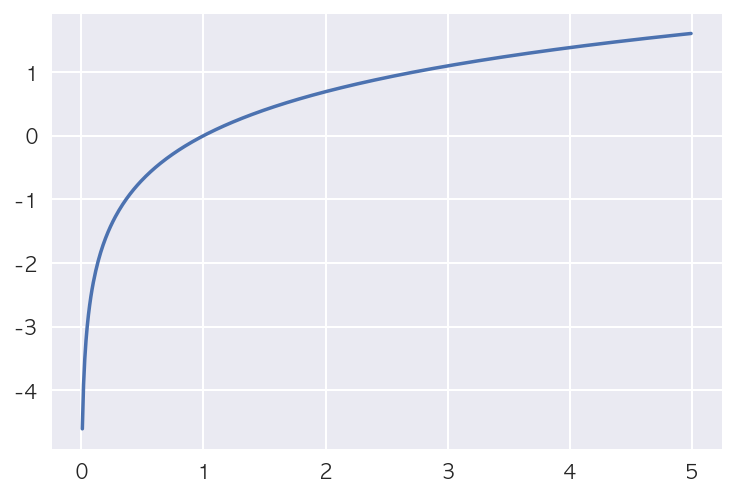

In [103]:
x = np.arange(0, 5, 0.01)
y = np.log(x)

plt.plot(x,y)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


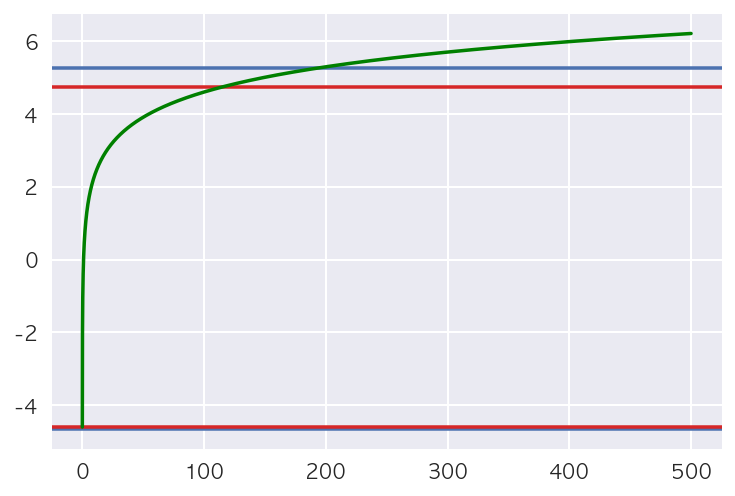

In [104]:
x = np.arange(0, 500, 0.01)
y = np.log(x)

max2016 = 4.737000
max2017 = 5.262999

min2016 = -4.605000
min2017 = -4.655420

#2016 logerror_range
plt.axhline(y=5.262999)
plt.axhline(y=-4.655420)

#2017 logerror_range
plt.axhline(y=4.737000, color='#d62728')
plt.axhline(y=-4.605000, color='#d62728')

plt.plot(x, y, 'g')

In [105]:
train2016["logerror"].describe()

count    90275.000000
mean         0.011457
std          0.161079
min         -4.605000
25%         -0.025300
50%          0.006000
75%          0.039200
max          4.737000
Name: logerror, dtype: float64

In [106]:
train2017["logerror"].describe() 

count    77613.000000
mean         0.016755
std          0.170887
min         -4.655420
25%         -0.024325
50%          0.006670
75%          0.039295
max          5.262999
Name: logerror, dtype: float64

In [107]:
def abs_log(value):
    return np.abs(value)

abs_logerror = train2016[["logerror", "transactiondate-month"]]
abs_logerror['logerror'] = abs_logerror["logerror"].apply(abs_log)


mean_abs_logerror = []
for month in range(1, 13):
    mean_logerror = np.mean(abs_logerror[abs_logerror['transactiondate-month'] == month])[0]
    mean_abs_logerror.append(mean_logerror)

print(mean_abs_logerror)

[0.07269484441732717, 0.07743447023527486, 0.07204392048081294, 0.06997150681988953, 0.0662409898604553, 0.06615773667826379, 0.06504399316376701, 0.066104257350133, 0.06727859007832825, 0.06474645368695983, 0.06396522453450158, 0.07595186889016693]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [108]:
np.mean(abs_logerror['logerror'])

0.06844671392965938

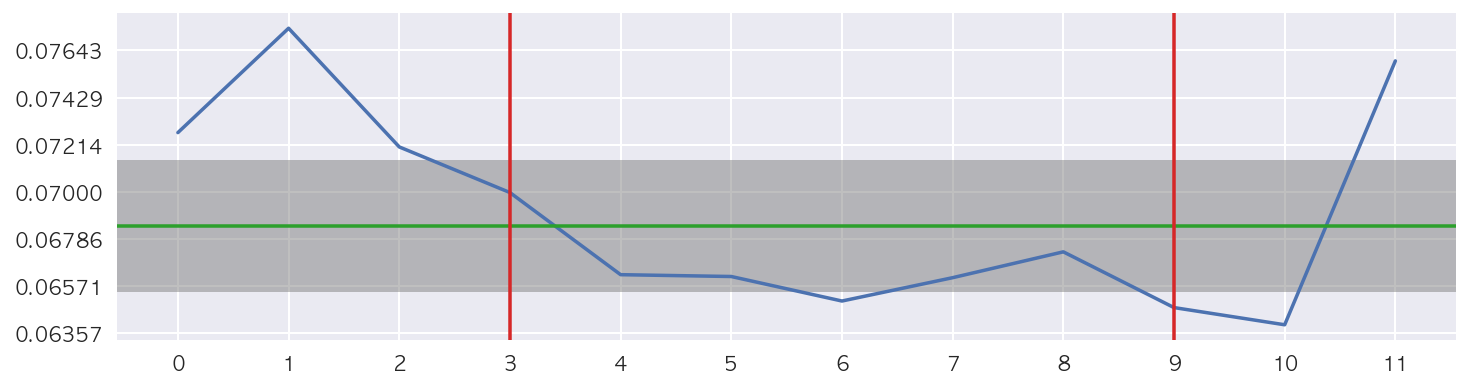

In [109]:
plt.figure(figsize=(12, 3))
plt.plot(mean_abs_logerror)
plt.yticks(np.linspace(0.055, 0.085, 15, endpoint=True))
plt.xticks(np.linspace(0,11,12,endpoint=True))

plt.axhline(y=np.mean(abs_logerror['logerror']), color='#2ca02c')
plt.axhspan(np.mean(abs_logerror['logerror']) - 0.003, np.mean(abs_logerror['logerror']) + 0.003, facecolor='0.5', alpha=0.5)

plt.axvline(x=3, color='#d62728')
plt.axvline(x=9, color='#d62728')

In [110]:
abs_logerror2 = train2017[["logerror", "transactiondate-month"]]
abs_logerror2['logerror'] = abs_logerror2["logerror"].apply(abs_log)


mean_abs_logerror2 = []
for month in range(1, 13):
    mean_logerror2 = np.mean(abs_logerror2[abs_logerror2['transactiondate-month'] == month])[0]
    mean_abs_logerror2.append(mean_logerror2)

print(mean_abs_logerror2)

[0.07477930168331944, 0.07240586960716204, 0.06897337779767679, 0.06891809858192849, 0.0678929644835958, 0.0692021345657187, 0.06355583267256856, 0.07502756593995932, 0.07468323193780589, nan, nan, nan]


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


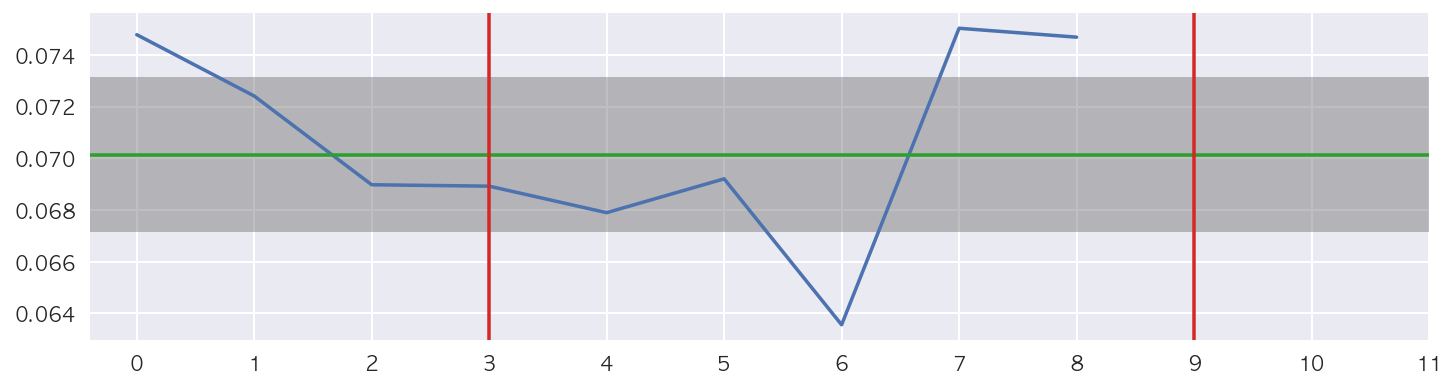

In [111]:
plt.figure(figsize=(12, 3))
plt.plot(mean_abs_logerror2)
#plt.yticks(np.linspace(0.0, 0.09, 15, endpoint=True))
plt.xticks(np.linspace(0,11,12,endpoint=True))

plt.axhline(y=np.mean(abs_logerror2['logerror']), color='#2ca02c')
plt.axhspan(np.mean(abs_logerror2['logerror']) - 0.003, np.mean(abs_logerror2['logerror']) + 0.003, facecolor='0.5', alpha=0.5)

plt.axvline(x=3, color='#d62728')
plt.axvline(x=9, color='#d62728')

## 2. Preprocessing

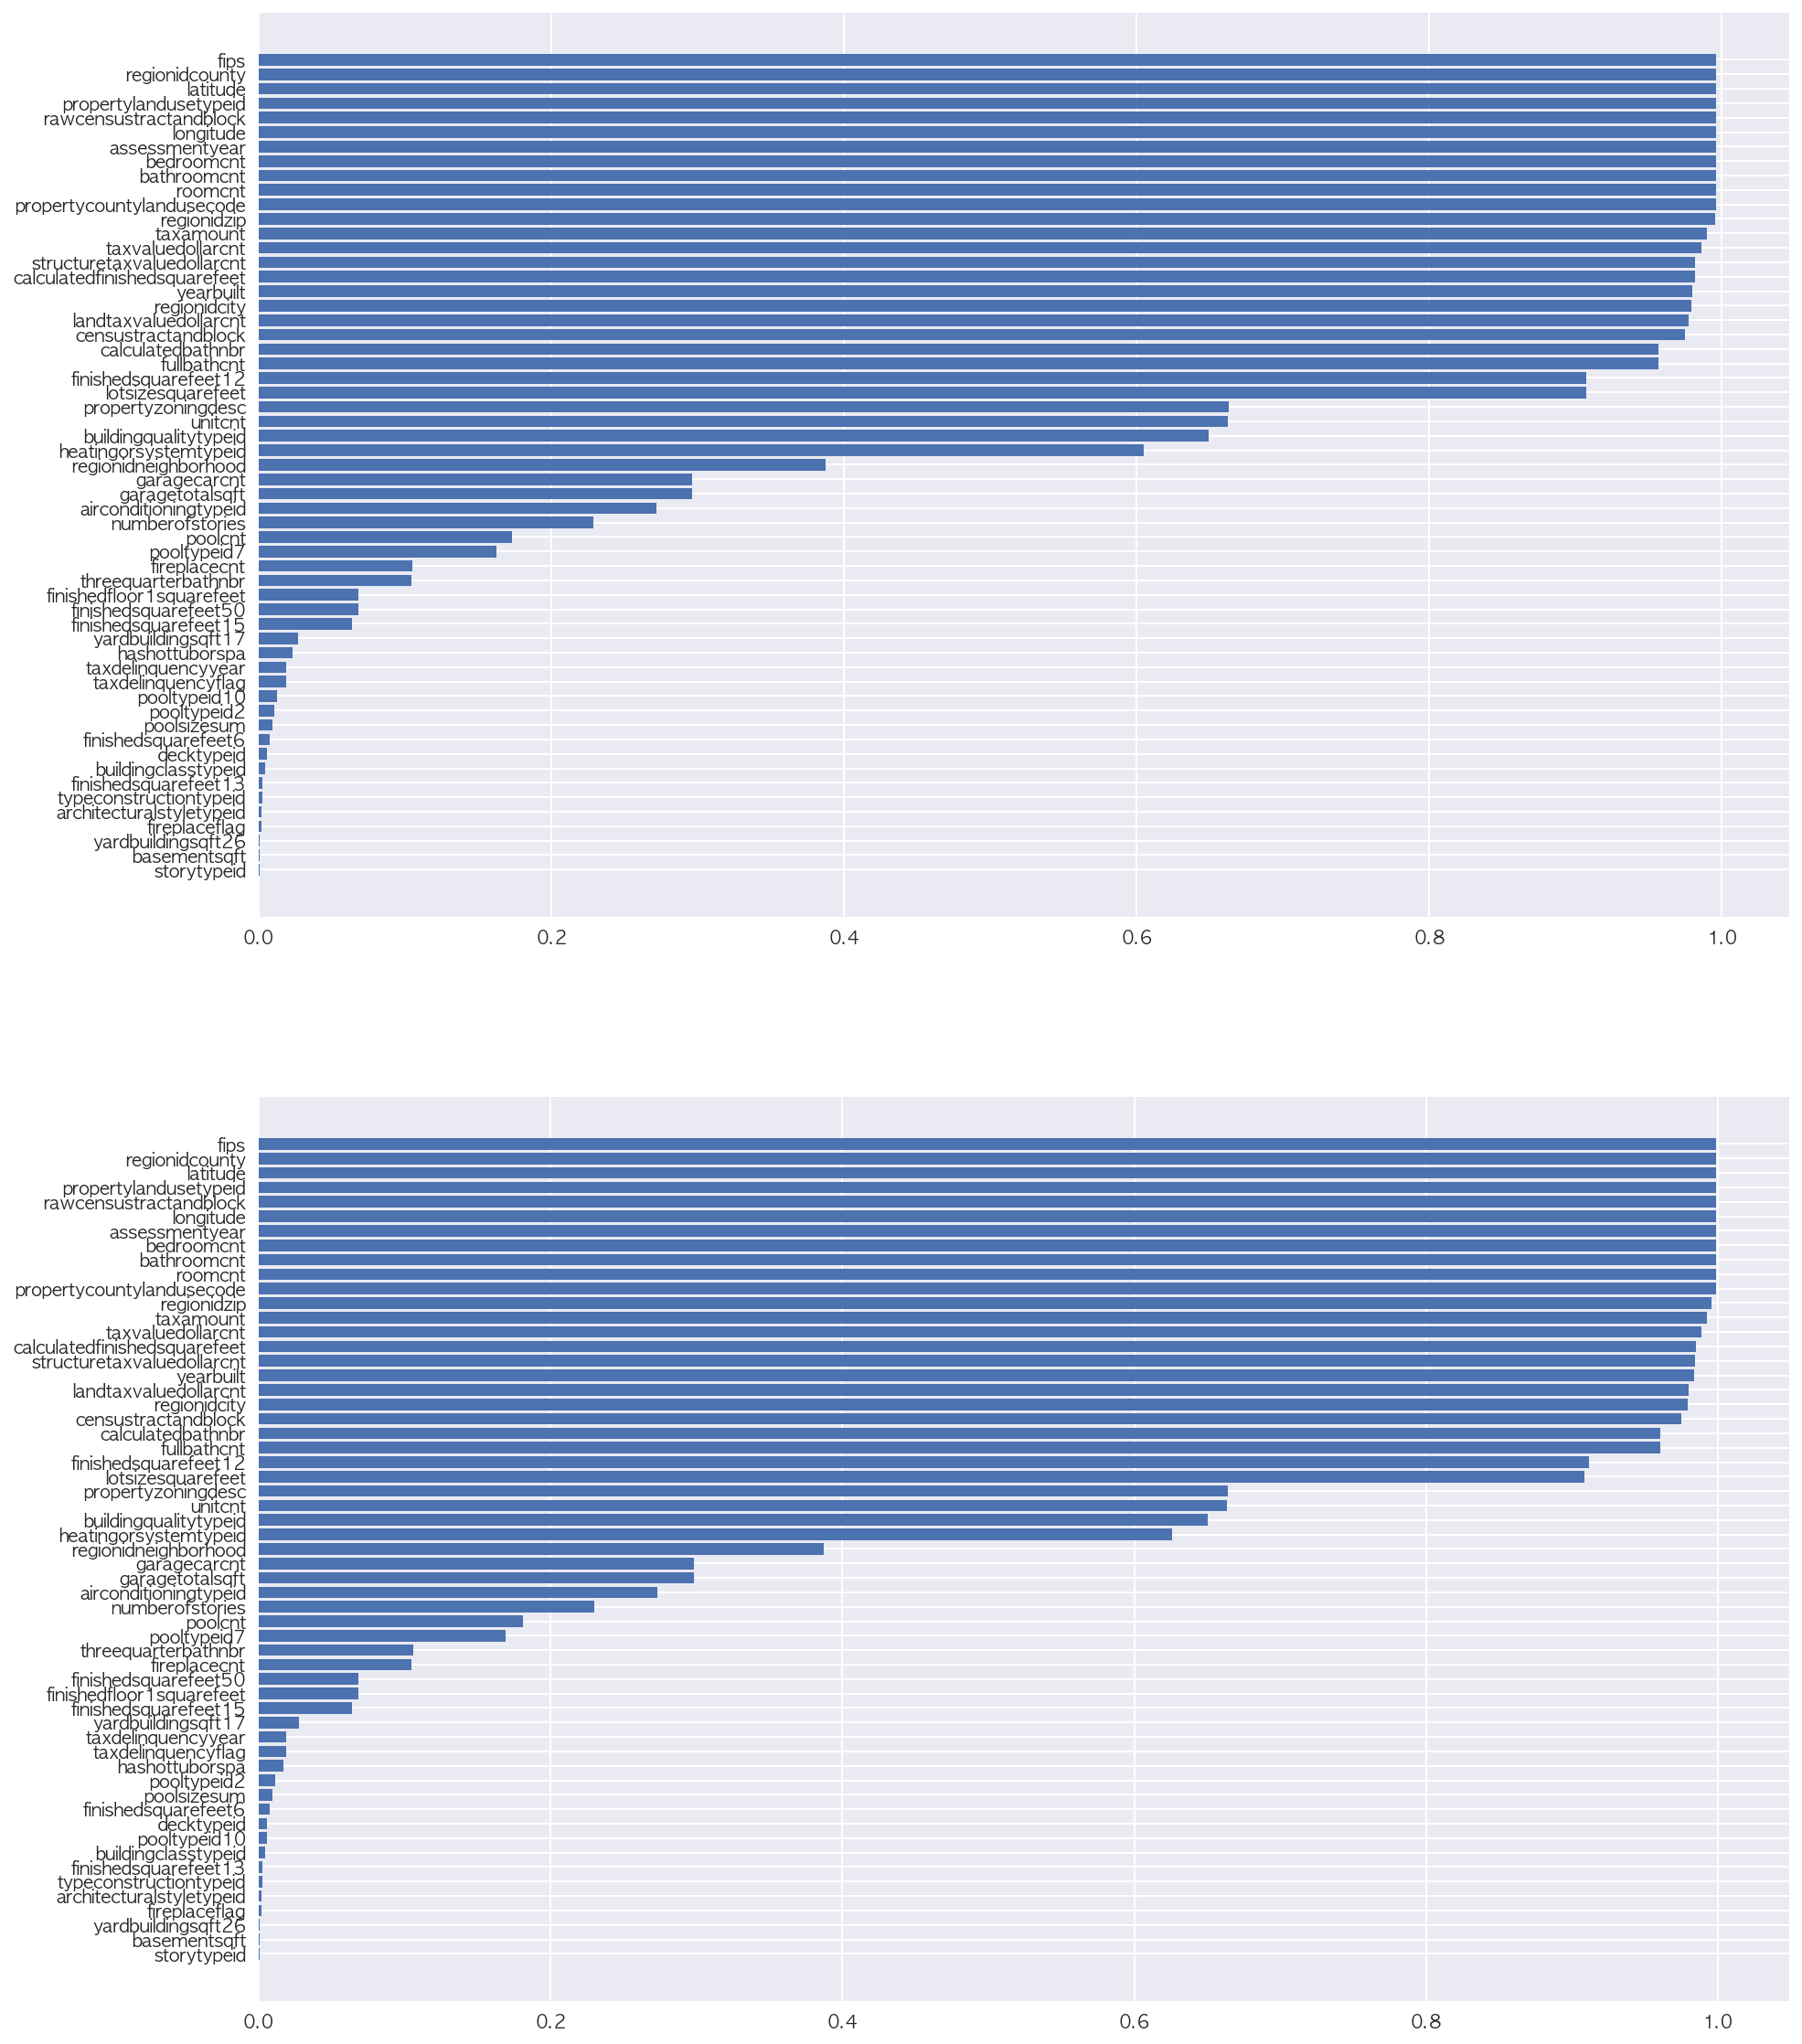

In [112]:
ratio_fill_data_2016 = property2016.drop(['parcelid'], axis=1).count()/len(property2016)
ratio_fill_data_2017 = property2017.drop(['parcelid'], axis=1).count()/len(property2017)
sorted_ratio_2016 = ratio_fill_data_2016.sort_values()
sorted_ratio_2017 = ratio_fill_data_2017.sort_values()

plt.figure(figsize=(15, 20))
plt.subplot(2,1,1)
plt.barh(sorted_ratio_2016.index, sorted_ratio_2016.values)
plt.subplot(2,1,2)
plt.barh(sorted_ratio_2017.index, sorted_ratio_2017.values)
plt.show()

### 내부의 요소에 관한 columns(10개)

### airconditioningtypeid / heatingorsystemtypeid

*Properties - 2016*

- airconditioningtypeid :  Type of cooling system present in the home (if any)
    - 집 안 냉방시스템 종류의 아이디(제품 번호)
    - 72.8%의 값이 Nan 값(소수점 둘째 자리에서 반올림)
    
    
- heatingorsystemtypeid :  Type of home heating system
    - 집 안 난방시스템 종류의 아이디(제품 번호)
    - 39.5%의 값이 Nan 값(소수점 둘째 자리에서 반올림)


- heatingorsystemtypeid == 2 일때, airconditioningtypeid 컬럼은 총 1156380개 인데 그중 빈값은 총 449720개이다.
    - heatingorsystemtypeid == 2 일때, airconditioningtypeid 컬럼에 채워져 있는 값의 99.99%가 1.0 이다.
    - '그러므로 heatingorsystemtypeid == 2 일때, airconditioningtypeid 컬럼의 빈값은 1.0 이다' 라는 사건의 확률은 99.99%라 할 수 있다.
    
    
- airconditioningtypeid == 1.0 일때, heatingorsystemtypeid 컬럼은 총 742364개 인데 그중 빈값은 총 13174개이다.
    - airconditioningtypeid == 1.0 일때, heatingorsystemtypeid 컬럼에 채워져 있는 값의 96.96%가 2.0 이다.
    - '그러므로 airconditioningtypeid == 1.0 일때, heatingorsystemtypeid 컬럼의 빈값은 2.0 이다' 라는 사건의 확률은 96.96%라 할 수 있다.
##### 위에 결과와 카테고리 컬럼이라는 점에서 최빈값인 1.0과 2.0으로 각각 채워서 사용하였다.

### fireplacecnt / fireplaceflag

- fireplacecnt / fireplaceflag 는 집에 있는 벽난로의 유무를 나타낸다.
- fireplacecnt는 89%가 NaN값이고, fireplaceflag 99%가 NaN 값이다.

#### NaN값이 너무 많아 필요한 정보를 가지고 있다고 보기 어렵기 때문에 최빈값으로 채워서 사용하보았으나, 모델에 아무런 영향을 주지 못하였다.


### Bathroomcnt, Calculatedbathnbr, Threequarterbathnbr, Fullbathcnt, Roomcnt, Bedroomcnt in Proprerites


- Bathroomcnt, Calculatedbathnbr, Threequarterbathnbr, Fullbathcnt, Roomcnt, Bedroomcnt 모두 
  logerror와 pairplot을 그려보았을 때, 그래프의 모양은 1/x(x분의 1)을 두텁께 그려놓은 모양을 이루거나, 아무런 모양을 이루지 않고 산발적으로 흩어져   있는 분포를 이루고 있었다.
  
- x^2, x^3, 1/x, log 함수를 이용하여 값을 변형하여 모델링을 시도해 보았으나, 효과가 없었다.

- Calculatedbathnbr 와 Bathroomcnt 은 서로 같은 값을 가지고 있어 NaN값이 덜 들어 있는 Bathroomcnt를 사용하였다.

- Roomcnt은 Bathroomcnt, Bedroomcnt과 선형을 이루고 있어 모델에서 제외하였다.
### 건물의 층과 관련된 columns (3개)
- numberofstories : 층수 
    - 데이터 타입 : float64
    - NaN의 비율 : 0.772141
    - 층수의 값이 NaN값인데 1층 면적이 존재하는 경우는 없음.
    - 층수의 값이 NaN값인데 건물세가 존재하는 값이 69340개 
    - 따라서 NaN의 값은 누락된 값이고 최빈도값이 1.0으로 대입할 필요도 존재
    - 또는 총 면적값을 보고 그 면적과 1층의 면적 값등을 보고 적당한 값을 대입  
- ~~storytypeid~~ :층의 타입(지하, 다락 등등) 총 35개의 카테고리로 분류되지만 7.0(basement)값만 있음.
    - 데이터 타입 : float64
    - NaN 비율 : 0.999524
    - NaN값의 비율이 너무 크고 특정 층수에 따른 storytypeid의 규칙도 존재하지 않아 임의로 채울수 없음  
- ~~basementsqft~~ : 지하층 면적
    - 데이터 타입 : float64
    - NaN 비율 : 0.999524
    - storytypeid의 값이 존재하면 basementsqft의 값도 존재하지만 데이터가 43개밖에 존재하지 않아 무의미함
    
### 면적과 관련된 columns (8개)

- ~~finishedfloor1squarefeet : 완성된 1층의 면적~~
    - 데이터 타입 : float64
    - NaN의 비율 : 0.924054(2016), 0.922217(2017)
    - 동일한 데이터(finishedsquarefeet50)가 존재함, 단 32개의 데이터 값은 다르나 착오로 보여짐
- calculatedfinishedsquarefeet : 총 면적
    - 데이터 타입 : float64
    - NaN의 비율 : 0.007322(2016), 0.003028(2017)
    - NaN 값의 처리 : 평균값
- ~~finishedsquarefeet6 : 완료되거나 완료되지 않은 면적~~
    - 데이터타입 : float64
    - NaN의 비율 : 0.995336(2016), 0.995027(2017)
    - NaN값을 calculatedfinishedsquarefeet의 값으로 채워줌, 따라서 동일한 데이터가 되어 사용 불가
- ~~finishedsquarefeet12 : 완료된 주거공간 면적(33개의 NaN값은 0으로 정해짐)~~
    - 데이터 타입 : float64
    - NaN의 비율 : 0.051831(2016), 0.047544(2017)
    - NaN의 처리 : 대부분 데이터가 calculatedfinishedsquarefeet와 동일하고 33개의 NaN값은 0으로 정해짐
- ~~finishedsquarefeet13 : 주변 생활 공간 면적~~
    - 데이터 타입 : float64
    - NaN의 비율 : 0.999634(2016), 0.999459(2017)
    - NaN의 비율 : lotsizesquarefeet에서 finishedsquarefeet50을 뺀 값을 채워준후 나머지는 0으로 채워줌
- ~~finishedsquarefeet15 : 총 면적~~
    - 데이터 타입 : float64
    - NaN의 비율 : 0.960521(2016), 0.960999(2017)
    - calculatedfinishedsquarefeet와 동일한 데이터이고 데이터의 수가 훨씬 적기 때문에 사용 불가 
    - NaN의 처리 : calculatedfinishedsquarefeet의 값으로 대체
- finishedsquarefeet50 : 완성된 1층의 면적
    - 데이터 타입 : float64
    - NaN의 비율 : 0.924054(2016), 0.922217(2017)
    - NaN의 처리 : 건물세가 있으면 평균값, 없으면 0
- lotsizesquarefeet : 장소들의 면적(몇몇 데이터는 수정 필요)
    - 데이터 타입 : float64
    - NaN의 비율 : 0.112434(2016), 0.106838(2017)
    - NaN의 처리 : 평균값 or 1층의 면적
    
### 건설 시기, 건물 구조물 등 columns (7개)

- yearbuilt : 건물이 지어진 시기
    - 데이터 타입 : float64
    - NaN의 비율 : 0.008374(2016), 0.003917(2017) 
    - NaN의 처리 : 1) 건물세가 없는 경우 0으로 채움
                 2) buildingqualitytypeid를 비교하여 같을 경우 그 값의 최빈도 해를 채움 
                 3) 나머니지는 건물이 지어진 연도의 최빈도 해
- ~~buildingclasstypeid~~ : 건물 종류, 내연성에 따라 5가지 카테고리로 나누어짐
    - 데이터 타입 : float64
    - NaN의 비율 : 0.999823(2016), 0.999807(2017)
    - NaN의 처리 : 임의적 선택이 거의 불가능하다고 판된되어 존재하는 데이터는 1 NaN값은 0으로 대체하여 유무로 판단
- ~~decktypeid~~ : 데크 타입 
    - 데이터 타입 : float64
    - NaN의 비율 : 0.992711(2016), 0.992089(2017)
    - NaN의 처리 : decktypeid의 값은 한가지의 데이터로 채워져 있는데 NaN값을 0으로 채워줄 수는 있지만 왜곡 가능성이 큼
- ~~architecturalstyletypeid~~ :
    - 데이터 타입 : float64
    - NaN의 비율 : 0.997109(2016), 0.997333(2017)
    - NaN의 처리 : 총 27가지의 유형이 있지만 대부분 NaN값으로 채워져 자의적 판단으로 채우기에는 문제가 있음
    
- ~~typeconstructiontypeid : 위와 같음~~
- unitcnt : NaN값이 누락된 경우가 많음
- buildingqualitytypeid : NaN값은 누락된 경우일 가능성이 크므로 평균값으로 대체

### 세금 관련 columns (7개)
- structuretaxvaluedollarcnt : 건물세
- landtaxvaluedollarcnt : 토지세
- taxvaluedollarcnt : 건물세 + 토지세
- taxamount : taxvaluedollarcnt에서 비율을 곱한 값
- ~~assessmentyear : 재산세 산정 연도~~(NaN값을 채우더라도 모두 2015가 되기때문에 의미가 없음)
- ~~taxdelinquencyflag : 이전해의 재산세 유무?~~
- taxdelinquencyyear : 이전까지 미납부된 재산세 납부 연도

### 위치 관련 및 기타 columns (22개)       
- 'regionidzip'
    - 건물이 위치한 지역의 우편번호.  fips로 groupby한 group의 최빈값으로 null값을 대체했다. 카테고리형 데이터지만 모델의 성능을 위해 선형 데이터로 사용했다.
- FIPS
    - 건물이 위치한 지역의 카운티를 나타내는 6059, 6111, 6037 세가지 값을 갖는다.      
- 'poolsizesum'  : 풀의 면적. poolcnt가 1이상인 row에 한해서 최빈값으로 null 값 대체.

In [113]:
type_properties_2016 = property2016.dtypes.reset_index()
type_properties_2016.columns = ["columns", "type"]
type_properties_2016

,columns,type
0,parcelid,int64
1,airconditioningtypeid,float64
2,architecturalstyletypeid,float64
3,basementsqft,float64
4,bathroomcnt,float64
5,bedroomcnt,float64
6,buildingclasstypeid,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,decktypeid,float64


### 2. 1  fill in NaN - Room, Bath, Bed
- fullbathcnt 와 bathroomcnt는 서로 비슷한 값을 가진다.
- threequarterbathnbr 최빈값인 1.0 으로 채운다.

Text(0,0.5,'bathroomcnt')

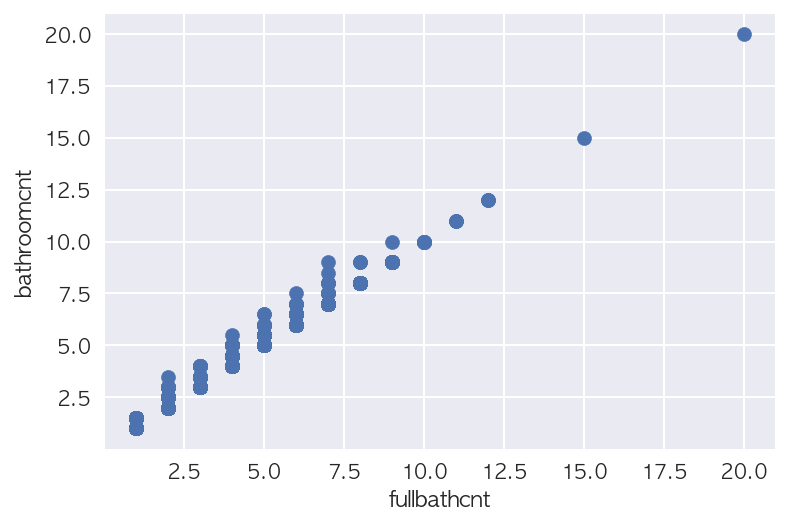

In [114]:
pyplot.scatter(train2016["fullbathcnt"], train2016["bathroomcnt"])
plt.xlabel("fullbathcnt")
plt.ylabel("bathroomcnt")

In [115]:
ls = train2016[np.isnan(train2016["fullbathcnt"])]["bathroomcnt"]
train2016.loc[np.isnan(train2016["fullbathcnt"]), "fullbathcnt"] = ls

train2016[np.isnan(train2016["fullbathcnt"])]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,abs_logerror,transactiondate-year,transactiondate-month,transactiondate-day,transactiondate-year_month


In [116]:
train2016["threequarterbathnbr"].value_counts()

1.0    11912
2.0       90
3.0        6
4.0        1
Name: threequarterbathnbr, dtype: int64

In [117]:
train2016.loc[np.isnan(train2016["threequarterbathnbr"]), "threequarterbathnbr"] = 1.0
train2016[np.isnan(train2016["threequarterbathnbr"])]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,abs_logerror,transactiondate-year,transactiondate-month,transactiondate-day,transactiondate-year_month


### 2.1.1 variable change : Log
- 독립 변수나 종속 변수가 심하게 한쪽으로 치우친 분포를 보이는 경우
- 변수 변환을 위해 log를 취한다.

In [118]:
def logg(x):
    if x == 0:
        return 0
    return np.log(x)

In [119]:
train2016["roomcnt_log"] = train2016["roomcnt"].apply(logg)
train2016["roomcnt_log"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: roomcnt_log, dtype: float64

In [120]:
train2016["bathroomcnt_log"] = train2016["bathroomcnt"].apply(logg)
train2016["bathroomcnt_log"].head()

0    1.098612
1    1.098612
2    0.693147
3    0.693147
4    0.693147
Name: bathroomcnt_log, dtype: float64

In [121]:
train2016["threequarterbathnbr_log"] = train2016["threequarterbathnbr"].apply(logg)
train2016["threequarterbathnbr_log"].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: threequarterbathnbr_log, dtype: float64

In [122]:
train2016["fullbathcnt_log"] = train2016["fullbathcnt"].apply(logg)
train2016["fullbathcnt_log"].head()

0    1.098612
1    1.098612
2    0.693147
3    0.693147
4    0.693147
Name: fullbathcnt_log, dtype: float64

In [123]:
train2016["bedroomcnt_log"] = train2016["bedroomcnt"].apply(logg)
train2016["bedroomcnt_log"].head()

0    1.386294
1    1.098612
2    1.098612
3    1.386294
4    1.386294
Name: bedroomcnt_log, dtype: float64

### 2. 2 fill in NaN - airconditioningtypeid, heatingorsystemtypeid
- 각각의 최빈값인 airconditioningtypeid=1.0, heatingorsystemtypeid=2.0을 넣어준다.

In [124]:
train2016.loc[np.isnan(train2016["airconditioningtypeid"]), "airconditioningtypeid"] = 1.0
train2016.loc[np.isnan(train2016["heatingorsystemtypeid"]), "heatingorsystemtypeid"] = 2.0
train2016[["airconditioningtypeid", "heatingorsystemtypeid"]].isna().sum()

airconditioningtypeid    0
heatingorsystemtypeid    0
dtype: int64

### 2. 3 fill in NaN - airconditioningtypeid, heatingorsystemtypeid
- fireplacecnt의 최빈값 1.0, fireplaceflag 는 들어있는 true값을 제외하고 모두 false (1/0)

In [125]:
train2016["fireplaceflag"] = train2016["fireplaceflag"].astype(float)

train2016.loc[np.isnan(train2016["fireplacecnt"]), "fireplacecnt"] = 1.0
train2016.loc[np.isnan(train2016["fireplaceflag"]), "fireplaceflag"] = 0.0
train2016[["fireplacecnt", "fireplaceflag"]].isna().sum()

fireplacecnt     0
fireplaceflag    0
dtype: int64

In [126]:
print(train2016.shape)

(90275, 70)


### 2. 3 fill in NaN - structuretaxvaluedollarcnt, taxamount, taxdelinquencyflag
- structuretaxvaluedollarcnt = taxvaluedollarcnt - landtaxvaluedollarcnt
- taxamount : taxamount와 taxvaluedollarcnt의 비율을 구한다음 평균값을 구해서 taxvaluedollarcnt에 곱해준 값을 채움
- taxdelinquencyflag : Y값은 1로 대체 NaN 값은 0으로 대체

In [127]:
train2016.loc[np.isnan(train2016["taxvaluedollarcnt"]), "taxvaluedollarcnt"] = np.mean(train2016["taxvaluedollarcnt"].notnull())
train2016.loc[np.isnan(train2016["landtaxvaluedollarcnt"]), "landtaxvaluedollarcnt"] = np.mean(train2016["landtaxvaluedollarcnt"].notnull())
train2016["structuretaxvaluedollarcnt"] = train2016["taxvaluedollarcnt"] - train2016["landtaxvaluedollarcnt"]
train2016.loc[train2016["taxdelinquencyflag"] == 'Y', "taxdelinquencyflag"] = 1.0
train2016.loc[train2016["taxdelinquencyflag"].isnull(), "taxdelinquencyflag"] = 0.0

In [128]:
# NaN_taxamount = avg(taxamount / taxvaluedollarcnt) * taxvaluedollarcnt

In [129]:
rate = (train2016[~np.isnan(train2016["taxamount"])]["taxamount"] / train2016[~np.isnan(train2016["taxamount"])]["taxvaluedollarcnt"]).mean()

In [130]:
train2016.loc[np.isnan(train2016["taxamount"]), "taxamount"] = rate * train2016[np.isnan(train2016["taxamount"])]["taxvaluedollarcnt"]

### 2.4 fill in NaN - numberofstories
- numberofstories : structuretaxvaluedollarcnt가 0이면 0, 나머지는 1.0으로 채워줌, 최빈값
- 건물세가 없고 층이 Nan값이면 0으로 채움
- 1층 면적이 있고 층이 Nan값이면 1로 채워줌

In [131]:
train2016.loc[train2016["numberofstories"].isnull() & train2016["structuretaxvaluedollarcnt"]==0.0 ,"numberofstories"] = 0.0
train2016.loc[(train2016["numberofstories"] == 0.0) & train2016["finishedfloor1squarefeet"].notnull(), "numberofstories"] = 1.0
train2016["numberofstories"].fillna(value = 1.0, inplace = True)
#storytypeid: 0으로 채워줌(유무)
train2016["storytypeid"].fillna(value = 0, inplace = True)
train2016["basementsqft"].fillna(value = 0, inplace = True)

### 2.5 fill in NaN - finishedsquarefeet

In [132]:
# 총면적이 1층 면적보다 작은경우 1층 면적을 총면적에 대입
train2016.loc[train2016["calculatedfinishedsquarefeet"].notnull() < train2016["finishedsquarefeet50"].notnull(), "calculatedfinishedsquarefeet"] = train2016["finishedsquarefeet50"]
# 층수가 없는 경우 총면적의 NaN은 0
train2016.loc[(train2016["numberofstories"] == 0.0) & train2016["calculatedfinishedsquarefeet"].isnull(), "calculatedfinishedsquarefeet"] = 0.0
# 건물이 있지만 총면적이 0인 경우 총면적의 평균을 대입
train2016.loc[(train2016["numberofstories"] != 0.0) & train2016["calculatedfinishedsquarefeet"].isnull(),"calculatedfinishedsquarefeet"] = np.mean(train2016["calculatedfinishedsquarefeet"].notnull())

In [133]:
# 1층의 면적을 나타내는 finishedfloor1squarefeet, finishedsquarefeet50의 Nan값은 calculatedfinishedsquarefeet의 값으로 대체(대부분 비슷하지만 조금 차이가남)
train2016.loc[train2016["finishedfloor1squarefeet"].isnull(), "finishedfloor1squarefeet"] = train2016.loc[train2016["finishedfloor1squarefeet"].isnull(),"calculatedfinishedsquarefeet"]
train2016.loc[train2016["finishedsquarefeet50"].isnull(), "finishedsquarefeet50"] = train2016.loc[train2016["finishedsquarefeet50"].isnull() ,"calculatedfinishedsquarefeet"]
train2016.loc[train2016["finishedsquarefeet6"].isnull(), "finishedsquarefeet6"] = train2016.loc[train2016["finishedsquarefeet6"].isnull(), "calculatedfinishedsquarefeet"]

In [134]:
# 총면적과 거주 공간외 공간의 면적이 같은 경우 거주 공간의 면적을 0으로 넣어줌
train2016.loc[train2016["calculatedfinishedsquarefeet"].notnull() == train2016["finishedsquarefeet13"].notnull(), "finishedsquarefeet12"] = 0.0
# finishedsquarefeet12의 NaN값은 calculatedfinishedsquarefeet와 일치 
train2016.loc[train2016["finishedsquarefeet12"].isnull(), "finishedsquarefeet12"] = train2016.loc[train2016["finishedsquarefeet12"].isnull(), "calculatedfinishedsquarefeet"]
train2016["finishedsquarefeet13"].fillna(value = 0.0, inplace=True)
# finishedsquarefeet15 : calculatedfinishedsquarefeet의 값으로 채워줌
train2016.loc[train2016["finishedsquarefeet15"].isnull(), "finishedsquarefeet15"] = train2016.loc[train2016["finishedsquarefeet15"].isnull(), "calculatedfinishedsquarefeet"]
# lotsizesquarefeet의 값이  finishedsquarefeet50(1층면적) 보다 작은 경우 1층면적으로 대체
train2016.loc[train2016["finishedsquarefeet50"] > train2016["lotsizesquarefeet"], "lotsizesquarefeet"] = train2016.loc[train2016["finishedsquarefeet50"] > train2016["lotsizesquarefeet"] ,"finishedsquarefeet50"]
# calculatedfinishedsquarefeet(총면적)이 있는데 lotsizesquarefeet이 NaN인 경우 1층의 값으로 대입
train2016.loc[train2016["lotsizesquarefeet"].isnull() & train2016["calculatedfinishedsquarefeet"].notnull(), "lotsizesquarefeet"] = train2016.loc[train2016["lotsizesquarefeet"].isnull(), "finishedsquarefeet50"]

train2016.loc[train2016["yearbuilt"].isnull() & train2016["buildingqualitytypeid"] == 7.0, "yearbuilt"] = 1950
train2016.loc[train2016["yearbuilt"].isnull() & train2016["buildingqualitytypeid"] == 4.0, "yearbuilt"] = 1979
train2016["yearbuilt"].fillna(value = 1955, inplace = True)

train2016.loc[train2016["unitcnt"].isnull() & (train2016["calculatedfinishedsquarefeet"] == 0), "unitcnt"] = 0
train2016["unitcnt"].fillna(value = 1, inplace = True)

### 2.6 fill in NaN - building style

In [135]:
train2016["decktypeid"].fillna(value = 0.0, inplace = True)
train2016.loc[train2016["decktypeid"] == 66.0 , "decktypeid"] = 1
train2016.loc[train2016["buildingqualitytypeid"].isnull() & (train2016["structuretaxvaluedollarcnt"] == 0), "buildingqualitytypeid"]=0
train2016.loc[train2016["buildingqualitytypeid"].isnull(), "buildingqualitytypeid"] = train2016["buildingqualitytypeid"].mode()[0]
train2016.loc[train2016["buildingclasstypeid"].notnull(), "buildingclasstypeid"] = 1
train2016.loc[train2016["buildingclasstypeid"].isnull(), "buildingclasstypeid"] = 0
train2016["architecturalstyletypeid"].fillna(value=7, inplace=True)
train2016['typeconstructiontypeid'].fillna(value=6, inplace=True)

In [136]:
print(train2016.shape)

(90275, 70)


### 2.7 fill in NaN - yardbuildingsqft17, garagecarcnt, garagetotalsqft 

In [137]:
train2016.loc[train2016.yardbuildingsqft17.isnull(), 'yardbuildingsqft17'] = 0.0
train2016[['garagecarcnt', 'garagetotalsqft']][(train2016.garagetotalsqft != 0) & (train2016.garagecarcnt == 0)]
train2016.loc[17269025, 'garagecarcnt'] = 1.0
train2016.loc[np.isnan(train2016["garagecarcnt"]), "garagecarcnt"] = 0.0
train2016.loc[np.isnan(train2016["garagecarcnt"])]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,abs_logerror,transactiondate-year,transactiondate-month,transactiondate-day,transactiondate-year_month,roomcnt_log,bathroomcnt_log,threequarterbathnbr_log,fullbathcnt_log,bedroomcnt_log


In [138]:
prop_garages =  ['garagecarcnt', 'garagetotalsqft']
mean_garagesqft = train2016[prop_garages].groupby(['garagecarcnt']).agg('mean')

In [139]:
def garagesqft_fillna(garagecarcnt):
    x = round(mean_garagesqft.loc[garagecarcnt][0], 0)
    #print(x)
    train2016.loc[(train2016.garagecarcnt == garagecarcnt) & (train2016.garagetotalsqft == 0),'garagetotalsqft'] = x

In [140]:
for i in mean_garagesqft.index[1:] :
    garagesqft_fillna(i)

### 2.8 Fill NaN : poolcnt, pooltypeid2, pooltypeid7, pooltypeid10, yardbuildingsqft26

In [141]:
train2016["garagecarcnt"].fillna(value=0, inplace=True)
train2016["garagetotalsqft"].fillna(value=0, inplace=True)
train2016["poolcnt"].fillna(value=0.0, inplace=True)
train2016['pooltypeid2'].fillna(value=0, inplace=True)
train2016['pooltypeid7'].fillna(value=0, inplace=True)
train2016['pooltypeid10'].fillna(value=0, inplace=True)
train2016["yardbuildingsqft26"].fillna(value=1, inplace=True)

In [142]:
print(train2016.shape)

(90276, 70)


###  2.9 Fill NaN : poolsizesum

In [143]:
model_poolsizesum = sm.OLS.from_formula("poolsizesum~I(finishedsquarefeet50*0.01)+I(garagetotalsqft*0.01)+C(poolcnt)+0", data = train2016)
poolsizesum_result = model_poolsizesum.fit()
predicted_poolsizesum = poolsizesum_result.predict(train2016[['poolcnt','finishedsquarefeet50', 'garagetotalsqft']].dropna())

In [144]:
for i in predicted_poolsizesum.index :
    if train2016.loc[i, 'poolcnt'] > 0 & np.isnan(train2016.loc[i, "poolsizesum"]):
        train2016.loc[i, 'poolsizesum'] = round(predicted_poolsizesum.loc(0)[i], 0)
    else:
        pass
train2016.loc[train2016["poolsizesum"].isnull() & (train2016["poolcnt"]==0), "poolsizesum"] = 0
for_mean = train2016[train2016["poolcnt"]==1]["poolsizesum"]
train2016.loc[(train2016["poolcnt"] == 1) & train2016["poolsizesum"].isnull(), "poolsizesum"] = for_mean.dropna().mean()
train2016["yardbuildingsqft26"].fillna(value=1, inplace=True)

### 2.10  Fill NaN : regionidzip

In [145]:
train2016.loc[np.isnan(train2016["regionidzip"]) & (train2016["fips"] == 6059.0), "regionidzip"] = 96987.0
train2016.loc[np.isnan(train2016["regionidzip"]) & (train2016["fips"] == 6111.0), "regionidzip"] = 97118.0

In [146]:
train2016 = train2016[:90275]

In [147]:
exc_list = ["logerror","calculatedbathnbr", "hashottuborspa", "propertyzoningdesc", "regionidneighborhood", "taxdelinquencyyear",\
           "yardbuildingsqft26", "longitude", "latitude", "propertycountylandusecode", "propertylandusetypeid",\
           "rawcensustractandblock", "censustractandblock", "regionidcity", "regionidcounty", "finishedfloor1squarefeet",\
           "finishedsquarefeet6", "finishedsquarefeet12", "finishedsquarefeet15", "buildingclasstypeid",\
           "decktypeid", "architecturalstyletypeid", "typeconstructiontypeid", "parcelid", "transactiondate",\
           "bathroomcnt", "bedroomcnt", "roomcnt", "threequarterbathnbr", "fullbathcnt", "abs_logerror", "fireplaceflag","taxdelinquencyflag","transactiondate-year_month"]

col_list = [c for c in train2016.columns if c not in exc_list]
print(len(col_list))
col_list

36


['airconditioningtypeid',
 'basementsqft',
 'buildingqualitytypeid',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet13',
 'finishedsquarefeet50',
 'fips',
 'fireplacecnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'regionidzip',
 'storytypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'transactiondate-year',
 'transactiondate-month',
 'transactiondate-day',
 'roomcnt_log',
 'bathroomcnt_log',
 'threequarterbathnbr_log',
 'fullbathcnt_log',
 'bedroomcnt_log']

In [148]:
train2016[col_list].dtypes

airconditioningtypeid           float64
basementsqft                    float64
buildingqualitytypeid           float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet13            float64
finishedsquarefeet50            float64
fips                            float64
fireplacecnt                    float64
garagecarcnt                    float64
garagetotalsqft                 float64
heatingorsystemtypeid           float64
lotsizesquarefeet               float64
poolcnt                         float64
poolsizesum                     float64
pooltypeid10                    float64
pooltypeid2                     float64
pooltypeid7                     float64
regionidzip                     float64
storytypeid                     float64
unitcnt                         float64
yardbuildingsqft17              float64
yearbuilt                       float64
numberofstories                 float64
structuretaxvaluedollarcnt      float64
taxvaluedollarcnt               float64


## 3. Linear Regression Model

### 3.1 Building a Model

#### First Model

In [149]:
dfX = sm.add_constant(train2016[col_list])
dfy = train2016["logerror"]

model1 = sm.OLS(dfy, dfX)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     15.55
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.18e-84
Time:                        15:02:16   Log-Likelihood:                 36984.
No. Observations:               90275   AIC:                        -7.390e+04
Df Residuals:                   90242   BIC:                        -7.359e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
airconditioningt

#### Second Model - one-hot-encoding

In [150]:
model2 = sm.OLS.from_formula("logerror ~ \
    C(airconditioningtypeid) + \
    calculatedfinishedsquarefeet + \
    C(fips) + \
    garagetotalsqft + \
    C(heatingorsystemtypeid) + \
    lotsizesquarefeet + \
    C(pooltypeid10) + \
    C(pooltypeid2) + \
    C(pooltypeid7) + \
    regionidzip + \
    unitcnt + \
    structuretaxvaluedollarcnt + \
    landtaxvaluedollarcnt + \
    yardbuildingsqft17 + \
    yearbuilt + \
    numberofstories + \
    C(fireplaceflag) + \
    taxamount + \
    C(taxdelinquencyflag) + \
    roomcnt_log + \
    bathroomcnt_log + \
    threequarterbathnbr_log +0", data=train2016)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     14.35
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           1.97e-88
Time:                        15:02:20   Log-Likelihood:                 37000.
No. Observations:               90275   AIC:                        -7.392e+04
Df Residuals:                   90237   BIC:                        -7.357e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
C(aircon

#### Third Model - Scaling and one-hot-encoding

In [151]:
model3 = sm.OLS.from_formula("logerror ~ \
    C(airconditioningtypeid) + \
    basementsqft + \
    buildingqualitytypeid + \
    scale(calculatedfinishedsquarefeet) + \
    finishedsquarefeet13 + \
    scale(finishedsquarefeet50) + \
    C(fips) + \
    fireplacecnt + \
    garagecarcnt + \
    scale(garagetotalsqft) + \
    C(heatingorsystemtypeid) + \
    scale(lotsizesquarefeet) + \
    poolcnt + \
    poolsizesum + \
    C(pooltypeid10) + \
    C(pooltypeid2) + \
    C(pooltypeid7) + \
    scale(regionidzip) + \
    storytypeid + \
    unitcnt + \
    yardbuildingsqft17 + \
    yearbuilt + \
    numberofstories + \
    C(fireplaceflag) + \
    scale(structuretaxvaluedollarcnt) + \
    scale(taxvaluedollarcnt) + \
    scale(landtaxvaluedollarcnt) + \
    scale(taxamount) + \
    C(taxdelinquencyflag) + \
    roomcnt_log + \
    bathroomcnt_log + \
    threequarterbathnbr_log + \
    fullbathcnt_log + \
    bedroomcnt_log", data=train2016)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     11.65
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           3.73e-86
Time:                        15:02:30   Log-Likelihood:                 37009.
No. Observations:               90275   AIC:                        -7.392e+04
Df Residuals:                   90227   BIC:                        -7.347e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

#### we tried but... 

In [152]:
model4 = sm.OLS.from_formula("logerror ~  scale(basementsqft)+ scale(finishedsquarefeet13) + scale(lotsizesquarefeet)\
                            +scale(unitcnt)+ scale(bedroomcnt_log)\
                            +scale(regionidzip) + C(fips) +scale(taxvaluedollarcnt)+scale(taxamount)\
                            +scale(bathroomcnt_log) + scale(poolsizesum)+ scale(yearbuilt)+0", train2016)
print(model4.fit().summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     20.86
Date:                Sat, 07 Jul 2018   Prob (F-statistic):           2.94e-50
Time:                        15:02:38   Log-Likelihood:                 36871.
No. Observations:               90275   AIC:                        -7.371e+04
Df Residuals:                   90261   BIC:                        -7.358e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
C(fips)[6037.0]   

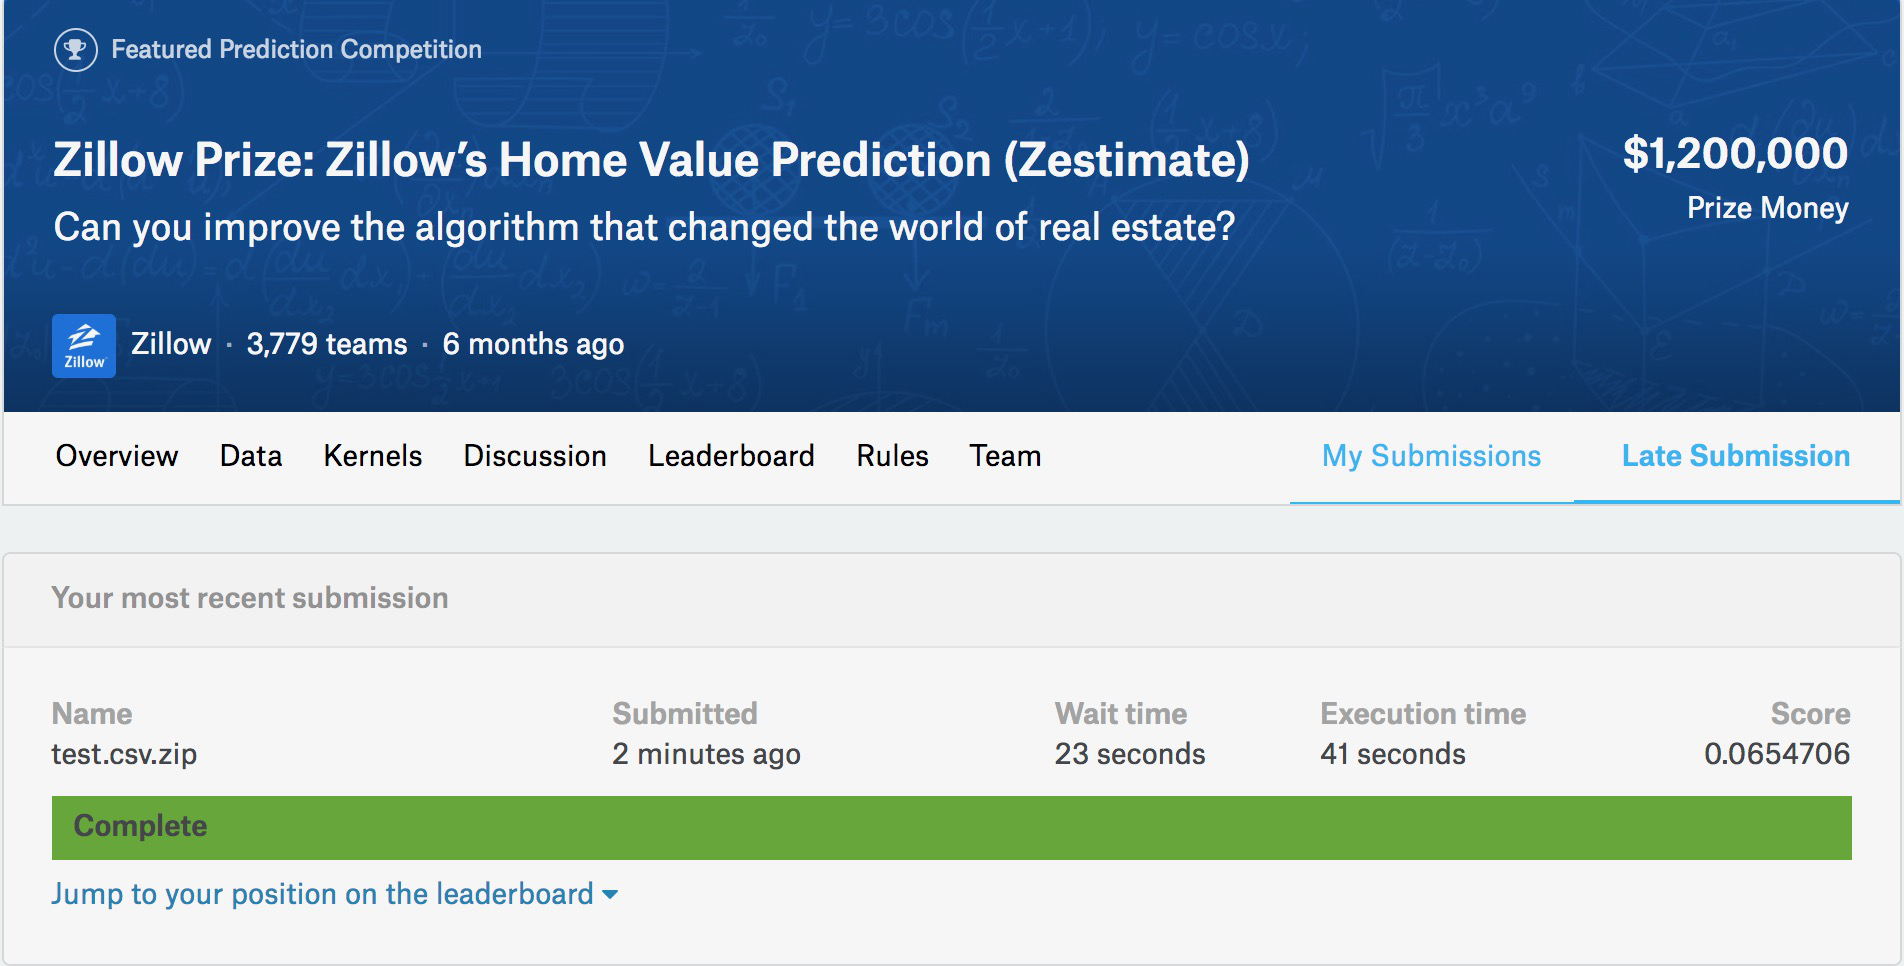

In [153]:
pil_im = pil.open("result.jpeg")
pil_im


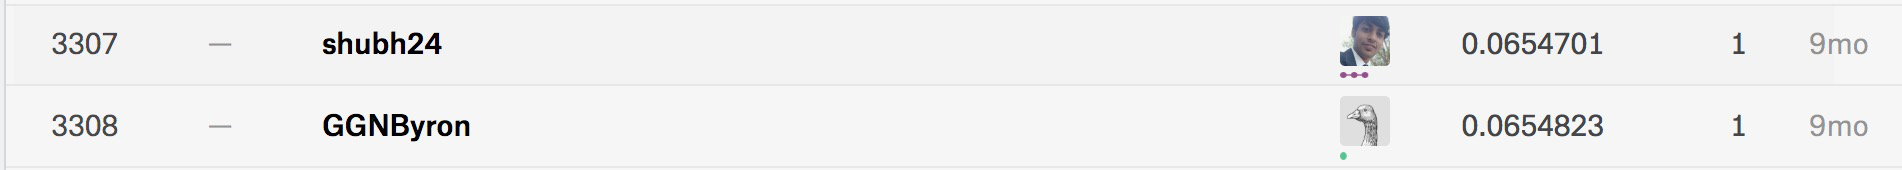

In [154]:
pil_im2 = pil.open("result2.jpeg")
pil_im2


### Linear Regression Model by ScikitLearn 

In [155]:
def MAE(y, ypred):
    #logerror=log(Zestimate)−log(SalePrice)
    return np.sum([abs(y[i]-ypred[i]) for i in range(len(y))]) / len(y)

In [156]:
reg = LinearRegression(n_jobs=-1)
reg.fit(train2016[col_list], train2016["logerror"])
print('fit...')
print(MAE(train2016["logerror"], reg.predict(train2016[col_list])))
y_hat = reg.predict(train2016[col_list])

fit...
0.06834213256490541


### Predicted Logerror

In [157]:
y_hat

array([0.01492649, 0.0025733 , 0.01772385, ..., 0.01122965, 0.02222781,
       0.00535163])

### Coefficient

In [158]:
pd.DataFrame(reg.coef_, index = col_list, columns=["coef_"])

,coef_
airconditioningtypeid,1.694543e-04
basementsqft,9.825240e-05
buildingqualitytypeid,4.853563e-04
calculatedfinishedsquarefeet,8.497646e-06
finishedsquarefeet13,1.994459e-05
finishedsquarefeet50,4.195362e-06
fips,-7.296549e-05
fireplacecnt,2.160320e-03
garagecarcnt,5.268801e-03
garagetotalsqft,-3.177497e-05
